In [7]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
%matplotlib inline

In [8]:
PATH = "C:\\Users\\Raphaela Edler\\Documents\\GIT\\SoSe 2021\\Fernerkundung\\Uebungen\\E4\\" 
FILENAME_2018 = "projected_Subset_S2A_MSIL2A_20181016T101021_N0209_R022_T33UVS_20181016T131706_resampled_wt.nc"
FILENAME_2019 = "projected_Subset_S2A_MSIL2A_20190921T101031_N0213_R022_T33UVS_20190921T130515_resampled_wt.nc"
FILENAME_REF_2018 = "referenceData2018.nc"
FILENAME_REF_2019 = "barkbeetlearea2019.nc"
data2018 =  xr.open_dataset(PATH + FILENAME_2018)
data2019 =  xr.open_dataset(PATH + FILENAME_2019)
ref2018 = PATH + FILENAME_REF_2018
ref2019 = PATH + FILENAME_REF_2019

In [9]:
data2018

<xarray.Dataset>
Dimensions:                       (lat: 1925, lon: 4981, time: 1)
Coordinates:
  * lat                           (lat) float64 51.0 51.0 51.0 ... 50.83 50.83
  * lon                           (lon) float64 14.0 14.0 14.0 ... 14.45 14.45
  * time                          (time) datetime64[ns] 2018-10-16
Data variables: (12/47)
    B1                            (time, lat, lon) float32 ...
    B2                            (time, lat, lon) float32 ...
    B3                            (time, lat, lon) float32 ...
    B4                            (time, lat, lon) float32 ...
    B5                            (time, lat, lon) float32 ...
    B6                            (time, lat, lon) float32 ...
    ...                            ...
    view_zenith_B10               (time, lat, lon) float32 ...
    view_azimuth_B10              (time, lat, lon) float32 ...
    view_zenith_B11               (time, lat, lon) float32 ...
    view_azimuth_B11              (time, lat, lon) float32 ...
    view_zenith_B12               (time, lat, lon) float32 ...
    view_azimuth_B12              (time, lat, lon) float32 ...
Attributes:
    Conventions:  CF-1.4
    TileSize:     385:293
    start_date:   16-OCT-2018 10:10:21.023999
    stop_date:    16-OCT-2018 10:10:21.023999

In [10]:
#Daten konvertieren zu Datenframe
df2018 = data2018.to_dataframe()
print(df2018.shape)
#df2018.sample(20)

(9588425, 47)


In [11]:
#Formel für NDVI
def NDVI(df2018):
    df2018['NDVI']=(df2018.B8 - df2018.B4)/(df2018.B8 + df2018.B4)  # Hinzufügen des neuen Bandes NDVI zum Datensatz

In [12]:
#NDVI
NDVI(df2018)

In [13]:
def plotting(df2018,vmin='NULL',vmax='NULL',cmap='NULL',title='NULL'):
    fig, ax = plt.subplots(figsize=(12,10))
    df2018.plot(ax=ax,vmin=vmin,vmax=vmax,cmap=cmap)
    plt.tight_layout();
    title=title
    plt.title(title, fontsize=22) 

AttributeError: 'Line2D' object has no property 'vmin'

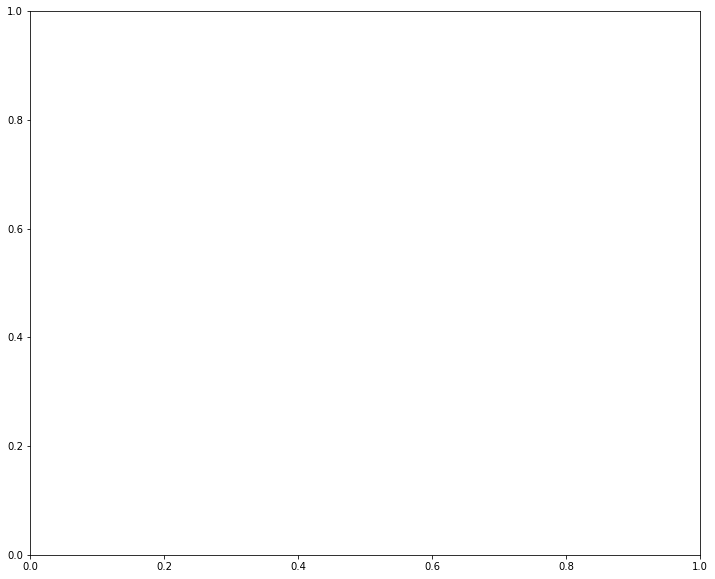

In [14]:
#NDVI plotten
plotting (df2018.NDVI,vmin=-0.2,vmax=0.8, cmap='BrBG', title='NDVI von 2018')

In [15]:
# Formel für BRI
def BRI (df2018):
    df2018 ['BRI'] = (1/1550)  - (1/700) / df2018.B8

In [16]:
#BRI
BRI(df2018)

AttributeError: 'Line2D' object has no property 'vmin'

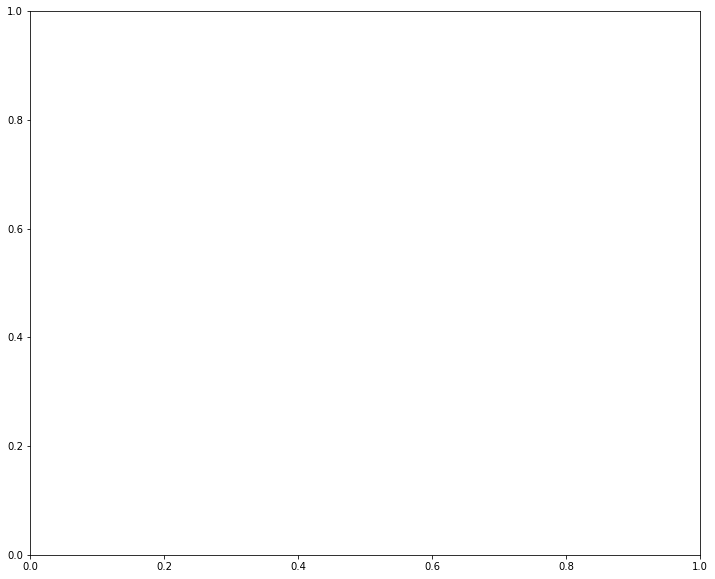

In [18]:
#BRI plotten
plotting (df2018.BRI,vmin=-1,vmax=1, cmap='BrBG', title='BRI von 2018')

In [19]:
#Formel für GVI
def GVI(df2018):
    df2018['GVI'] = -0.2848 * df2018.B2 - 0.24 * df2018.B3 - 0.5436 * df2018.B4 + 0.7243 * df2018.B8 + 0.0840 * df2018.B11 - 0.1800 * df2018.B12

In [ ]:
#GVI
GVI(df2018)

In [ ]:
#GVI plotten
plotting (df2018.GVI,vmin=-0.2,vmax=0.8, cmap='BrBG', title='GVI von 2018')

In [61]:
#Formel für WET
def WET(df2018):
    df2018['WET'] = 0.1509 * df2018.B2 +0.1973 * df2018.B3 + 0.3279 * df2018.B4 + 0.3406 * df2018.B8 - 0.7112 * df2018.B11 - 0.4572 * df2018.B12

In [ ]:
#WET
WET (df2018)

In [ ]:
#WET plotten
plotting (df2018.WET,vmin=-0.2,vmax=0.8, cmap='BrBG', title='WET von 2018')

In [ ]:
#UNSUPERVISED CLASSIFICATION

In [2]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
%matplotlib inline

In [3]:
PATH = 'D:\\E4\\1606\\' 
FILENAME = 'subset_0_of_projected_Subset_S2A_MSIL2A_20180409T101031_N0207_R022_T33UVS_20180409T154909_resampled_wt.nc'
ds = xr.open_dataset(PATH+FILENAME)  # loading dataset

In [4]:
ds

<xarray.Dataset>
Dimensions:                       (lat: 962, lon: 2733)
Coordinates:
  * lat                           (lat) float64 51.0 51.0 51.0 ... 50.83 50.83
  * lon                           (lon) float64 14.15 14.15 14.15 ... 14.4 14.4
Data variables: (12/47)
    B1                            (lat, lon) float32 ...
    B2                            (lat, lon) float32 ...
    B3                            (lat, lon) float32 ...
    B4                            (lat, lon) float32 ...
    B5                            (lat, lon) float32 ...
    B6                            (lat, lon) float32 ...
    ...                            ...
    view_zenith_B10               (lat, lon) float32 ...
    view_azimuth_B10              (lat, lon) float32 ...
    view_zenith_B11               (lat, lon) float32 ...
    view_azimuth_B11              (lat, lon) float32 ...
    view_zenith_B12               (lat, lon) float32 ...
    view_azimuth_B12              (lat, lon) float32 ...
Attributes:
    Conventions:  CF-1.4
    TileSize:     385:293
    start_date:   09-APR-2018 10:10:31.026000
    stop_date:    09-APR-2018 10:10:31.026000
    title:        NetCDF/CF Data Product

In [5]:
#First, we reduce our dataset so that just the spectral bands are used for our analysis.

ds_reduced = ds[['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12']]
ds_reduced

<xarray.Dataset>
Dimensions:  (lat: 962, lon: 2733)
Coordinates:
  * lat      (lat) float64 51.0 51.0 51.0 51.0 51.0 ... 50.83 50.83 50.83 50.83
  * lon      (lon) float64 14.15 14.15 14.15 14.15 14.15 ... 14.4 14.4 14.4 14.4
Data variables:
    B1       (lat, lon) float32 ...
    B2       (lat, lon) float32 ...
    B3       (lat, lon) float32 ...
    B4       (lat, lon) float32 ...
    B5       (lat, lon) float32 ...
    B6       (lat, lon) float32 ...
    B7       (lat, lon) float32 ...
    B8       (lat, lon) float32 ...
    B8A      (lat, lon) float32 ...
    B9       (lat, lon) float32 ...
    B11      (lat, lon) float32 ...
    B12      (lat, lon) float32 ...
Attributes:
    Conventions:  CF-1.4
    TileSize:     385:293
    start_date:   09-APR-2018 10:10:31.026000
    stop_date:    09-APR-2018 10:10:31.026000
    title:        NetCDF/CF Data Product

In [6]:
#Convert the xarray to a pandas dataframe in order to apply clustering and PCA afterwards

df = ds_reduced.to_dataframe()  # converting to pandas dataframe
df

B1  B2  B3  B4  B5  B6  B7  B8  B8A  B9  B11  B12
lat       lon                                                         
51.002887 14.149971 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  NaN  NaN
          14.150062 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  NaN  NaN
          14.150154 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  NaN  NaN
          14.150245 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  NaN  NaN
          14.150337 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  NaN  NaN
...                  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ...  ...
50.827062 14.399528 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  NaN  NaN
          14.399620 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  NaN  NaN
          14.399711 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  NaN  NaN
          14.399803 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  NaN  NaN
          14.399894 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  NaN  NaN

[2629146 rows x 12 columns]

In [7]:
#NANs

df.isnull().values.any()  # check if there are any NaNs
df.isnull().sum().sum()  # counting the NaNs in the whole dataframe, sum across columns and rows

535620

In [8]:
#deleting NANs

df = ds_reduced.to_dataframe().dropna(how='any')
df.isnull().sum().sum()

0

In [9]:
#kmeans clustering

n_clusters = 20 #number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=0) # init k-means model 
kmeans.fit_predict(df) # apply k-means to data 
print(kmeans.labels_)   # show the cluster number for each data point 

[2 2 2 ... 2 2 2]


In [10]:
#Copy the dataframe to a new dataframe and add the cluster label for each pixel.

df_cluster = df
df_cluster['KMeanCluster'] = kmeans.labels_  # adding the labels to our dataset

df_cluster['ClusterLabel'] = ""
df_cluster

B1      B2      B3      B4      B5      B6      B7  \
lat       lon                                                                 
51.002521 14.368608  0.0168  0.0124  0.0211  0.0160  0.0393  0.1078  0.1297   
          14.368700  0.0168  0.0125  0.0223  0.0177  0.0398  0.1037  0.1198   
          14.368791  0.0168  0.0145  0.0235  0.0227  0.0398  0.1037  0.1198   
          14.368883  0.0168  0.0145  0.0235  0.0227  0.0398  0.1037  0.1198   
          14.368974  0.0168  0.0174  0.0256  0.0222  0.0414  0.1020  0.1200   
...                     ...     ...     ...     ...     ...     ...     ...   
50.828160 14.156100  0.0201  0.0135  0.0261  0.0187  0.0418  0.1051  0.1316   
          14.156192  0.0201  0.0130  0.0244  0.0147  0.0418  0.1051  0.1316   
          14.156283  0.0201  0.0130  0.0244  0.0147  0.0418  0.1051  0.1316   
          14.156375  0.0201  0.0114  0.0220  0.0143  0.0368  0.0940  0.1172   
          14.156466  0.0201  0.0116  0.0211  0.0144  0.0368  0.0940  0.1172   

                         B8     B8A      B9     B11     B12  KMeanCluster  \
lat       lon                                                               
51.002521 14.368608  0.1367  0.1439  0.1387  0.0656  0.0345             2   
          14.368700  0.1213  0.1305  0.1387  0.0704  0.0367             2   
          14.368791  0.1164  0.1305  0.1387  0.0704  0.0367             2   
          14.368883  0.1164  0.1305  0.1387  0.0704  0.0367             2   
          14.368974  0.1402  0.1335  0.1387  0.0726  0.0416             2   
...                     ...     ...     ...     ...     ...           ...   
50.828160 14.156100  0.1470  0.1471  0.1443  0.0694  0.0362            19   
          14.156192  0.1350  0.1471  0.1443  0.0694  0.0362             2   
          14.156283  0.1350  0.1471  0.1443  0.0694  0.0362             2   
          14.156375  0.1200  0.1330  0.1443  0.0609  0.0273             2   
          14.156466  0.1171  0.1330  0.1443  0.0609  0.0273             2   

                    ClusterLabel  
lat       lon                     
51.002521 14.368608               
          14.368700               
          14.368791               
          14.368883               
          14.368974               
...                          ...  
50.828160 14.156100               
          14.156192               
          14.156283               
          14.156375               
          14.156466               

[2584511 rows x 14 columns]

In [65]:
clusterArray = []

for value in df["KMeanCluster"]:
    if value == 0:
        clusterArray.append("soil")
    elif value == 1:
        clusterArray.append("forest")
    elif value == 2:
        clusterArray.append("forest")
    elif value == 3:
        clusterArray.append("crop")
    elif value == 4:
        clusterArray.append("water")
    elif value == 5:
        clusterArray.append("crop")
    elif value == 6:
        clusterArray.append("forest")
    elif value == 7:
        clusterArray.append("crop")
    elif value == 8:
        clusterArray.append("barkbeetle")
    elif value == 9:
        clusterArray.append("crop")
    elif value == 10:
        clusterArray.append("barkbeetle")
    elif value == 11:
        clusterArray.append("crop")
    elif value == 12:
        clusterArray.append("NaN")
    elif value == 13:
        clusterArray.append("crop")
    elif value == 14:
        clusterArray.append("water")
    elif value == 15:
        clusterArray.append("crop")
    elif value == 16:
        clusterArray.append("soil")
    elif value == 17:
        clusterArray.append("NaN")
    elif value == 18:
        clusterArray.append("NaN")
    elif value == 19:
        clusterArray.append("NaN")
    else:
        clusterArray.append("Fail")
        
df_cluster['ClusterLabel'] = clusterArray

df_cluster

B1      B2      B3      B4      B5      B6      B7  \
lat       lon                                                                 
51.002521 14.368608  0.0168  0.0124  0.0211  0.0160  0.0393  0.1078  0.1297   
          14.368700  0.0168  0.0125  0.0223  0.0177  0.0398  0.1037  0.1198   
          14.368791  0.0168  0.0145  0.0235  0.0227  0.0398  0.1037  0.1198   
          14.368883  0.0168  0.0145  0.0235  0.0227  0.0398  0.1037  0.1198   
          14.368974  0.0168  0.0174  0.0256  0.0222  0.0414  0.1020  0.1200   
...                     ...     ...     ...     ...     ...     ...     ...   
50.828160 14.156100  0.0201  0.0135  0.0261  0.0187  0.0418  0.1051  0.1316   
          14.156192  0.0201  0.0130  0.0244  0.0147  0.0418  0.1051  0.1316   
          14.156283  0.0201  0.0130  0.0244  0.0147  0.0418  0.1051  0.1316   
          14.156375  0.0201  0.0114  0.0220  0.0143  0.0368  0.0940  0.1172   
          14.156466  0.0201  0.0116  0.0211  0.0144  0.0368  0.0940  0.1172   

                         B8     B8A      B9     B11     B12  KMeanCluster  \
lat       lon                                                               
51.002521 14.368608  0.1367  0.1439  0.1387  0.0656  0.0345             2   
          14.368700  0.1213  0.1305  0.1387  0.0704  0.0367             2   
          14.368791  0.1164  0.1305  0.1387  0.0704  0.0367             2   
          14.368883  0.1164  0.1305  0.1387  0.0704  0.0367             2   
          14.368974  0.1402  0.1335  0.1387  0.0726  0.0416             2   
...                     ...     ...     ...     ...     ...           ...   
50.828160 14.156100  0.1470  0.1471  0.1443  0.0694  0.0362            19   
          14.156192  0.1350  0.1471  0.1443  0.0694  0.0362             2   
          14.156283  0.1350  0.1471  0.1443  0.0694  0.0362             2   
          14.156375  0.1200  0.1330  0.1443  0.0609  0.0273             2   
          14.156466  0.1171  0.1330  0.1443  0.0609  0.0273             2   

                    ClusterLabel  
lat       lon                     
51.002521 14.368608       forest  
          14.368700       forest  
          14.368791       forest  
          14.368883       forest  
          14.368974       forest  
...                          ...  
50.828160 14.156100          NaN  
          14.156192       forest  
          14.156283       forest  
          14.156375       forest  
          14.156466       forest  

[2584511 rows x 14 columns]

In [68]:
#NEW COLUMN FOR LABELING

df_cluster['ClusterNumber'] = df_cluster.KMeanCluster

df_cluster

B1      B2      B3      B4      B5      B6      B7  \
lat       lon                                                                 
51.002521 14.368608  0.0168  0.0124  0.0211  0.0160  0.0393  0.1078  0.1297   
          14.368700  0.0168  0.0125  0.0223  0.0177  0.0398  0.1037  0.1198   
          14.368791  0.0168  0.0145  0.0235  0.0227  0.0398  0.1037  0.1198   
          14.368883  0.0168  0.0145  0.0235  0.0227  0.0398  0.1037  0.1198   
          14.368974  0.0168  0.0174  0.0256  0.0222  0.0414  0.1020  0.1200   
...                     ...     ...     ...     ...     ...     ...     ...   
50.828160 14.156100  0.0201  0.0135  0.0261  0.0187  0.0418  0.1051  0.1316   
          14.156192  0.0201  0.0130  0.0244  0.0147  0.0418  0.1051  0.1316   
          14.156283  0.0201  0.0130  0.0244  0.0147  0.0418  0.1051  0.1316   
          14.156375  0.0201  0.0114  0.0220  0.0143  0.0368  0.0940  0.1172   
          14.156466  0.0201  0.0116  0.0211  0.0144  0.0368  0.0940  0.1172   

                         B8     B8A      B9     B11     B12  KMeanCluster  \
lat       lon                                                               
51.002521 14.368608  0.1367  0.1439  0.1387  0.0656  0.0345             2   
          14.368700  0.1213  0.1305  0.1387  0.0704  0.0367             2   
          14.368791  0.1164  0.1305  0.1387  0.0704  0.0367             2   
          14.368883  0.1164  0.1305  0.1387  0.0704  0.0367             2   
          14.368974  0.1402  0.1335  0.1387  0.0726  0.0416             2   
...                     ...     ...     ...     ...     ...           ...   
50.828160 14.156100  0.1470  0.1471  0.1443  0.0694  0.0362            19   
          14.156192  0.1350  0.1471  0.1443  0.0694  0.0362             2   
          14.156283  0.1350  0.1471  0.1443  0.0694  0.0362             2   
          14.156375  0.1200  0.1330  0.1443  0.0609  0.0273             2   
          14.156466  0.1171  0.1330  0.1443  0.0609  0.0273             2   

                    ClusterLabel  ClusterNumber  
lat       lon                                    
51.002521 14.368608       forest              2  
          14.368700       forest              2  
          14.368791       forest              2  
          14.368883       forest              2  
          14.368974       forest              2  
...                          ...            ...  
50.828160 14.156100          NaN             19  
          14.156192       forest              2  
          14.156283       forest              2  
          14.156375       forest              2  
          14.156466       forest              2  

[2584511 rows x 15 columns]

In [ ]:
df['ClusterNumber'] = df['ClusterNumber'].replace(['1st old value','2nd old value',...],'new value')

In [12]:
#Convert the clustering result back to xarray to make a map and save the result as NetCDF.

ds_cluster = df_cluster.to_xarray()  # converting the dataframe to an xarray dataset for easy plotting
ds_cluster = ds_cluster.sortby('lon')  # and sorting the longitude to avoid raising an error while plotting and being able
                                       # to save the data correctly
ds_cluster

<xarray.Dataset>
Dimensions:       (lat: 954, lon: 2733)
Coordinates:
  * lat           (lat) float64 51.0 51.0 51.0 51.0 ... 50.83 50.83 50.83 50.83
  * lon           (lon) float64 14.15 14.15 14.15 14.15 ... 14.4 14.4 14.4 14.4
Data variables: (12/14)
    B1            (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    B2            (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    B3            (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    B4            (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    B5            (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    B6            (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    ...            ...
    B8A           (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    B9            (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    B11           (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    B12           (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    KMeanCluster  (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
    ClusterLabel  (lat, lon) object nan nan nan nan nan ... nan nan nan nan nan

In [13]:
SAVING_FILENAME = "new_kmeans_clustered_subset_april_of_projected_Subset_S2A_MSIL2A_20180409T101031_N0207_R022_T33UVS_20180409T154909_resampled_wt.nc"
ds_cluster.to_netcdf(PATH + SAVING_FILENAME)

In [14]:
#Defines a function to plot the clustering result as a thematic map

def plotting_lc(ds,cmap='NULL', variable='NULL',n_clusters='NULL',legend_labels='NULL',title='NULL'):  # modifying plotting function to achieve a discrete colorbar
    ds = ds.sortby('lat', ascending=False)
    
    fig, ax = plt.subplots(figsize=(15,10), dpi=100)
    ax.imshow(ds[variable],cmap=cmap, aspect='auto')
    
    # specifying legend
    norm= colors.BoundaryNorm(np.arange(0,n_clusters+1)-0.5, n_clusters)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    cbar = plt.colorbar(sm, ticks=np.arange(0,n_clusters), fraction=0.042, pad=0.02)

    cbar.set_label('cluster')
    cbar.ax.set_yticklabels(legend_labels)
    
    # specifiying x- and y-axis
    lon_ticks = np.around(np.linspace(ds.lon.data.min(), ds.lon.data.max(), 6), 2)
    lon_ticks_pos = np.linspace(0, len(ds.lon.data), 6)
    lat_ticks = np.around(np.linspace(ds.lat.data.max(), ds.lat.data.min(), 6), 2)
    lat_ticks_pos = np.linspace(0, len(ds.lat.data), 6)
    ax.set_xticks(lon_ticks_pos)
    ax.set_xticklabels(lon_ticks)
    ax.set_yticks(lat_ticks_pos)
    ax.set_yticklabels(lat_ticks)
    ax.set_xlabel('lon')
    ax.set_ylabel('lat')
    
    plt.tight_layout()
    plt.title(title, fontsize=22)
    
    plt.savefig('D:\\E4\\kmeans_clustering_april.png')

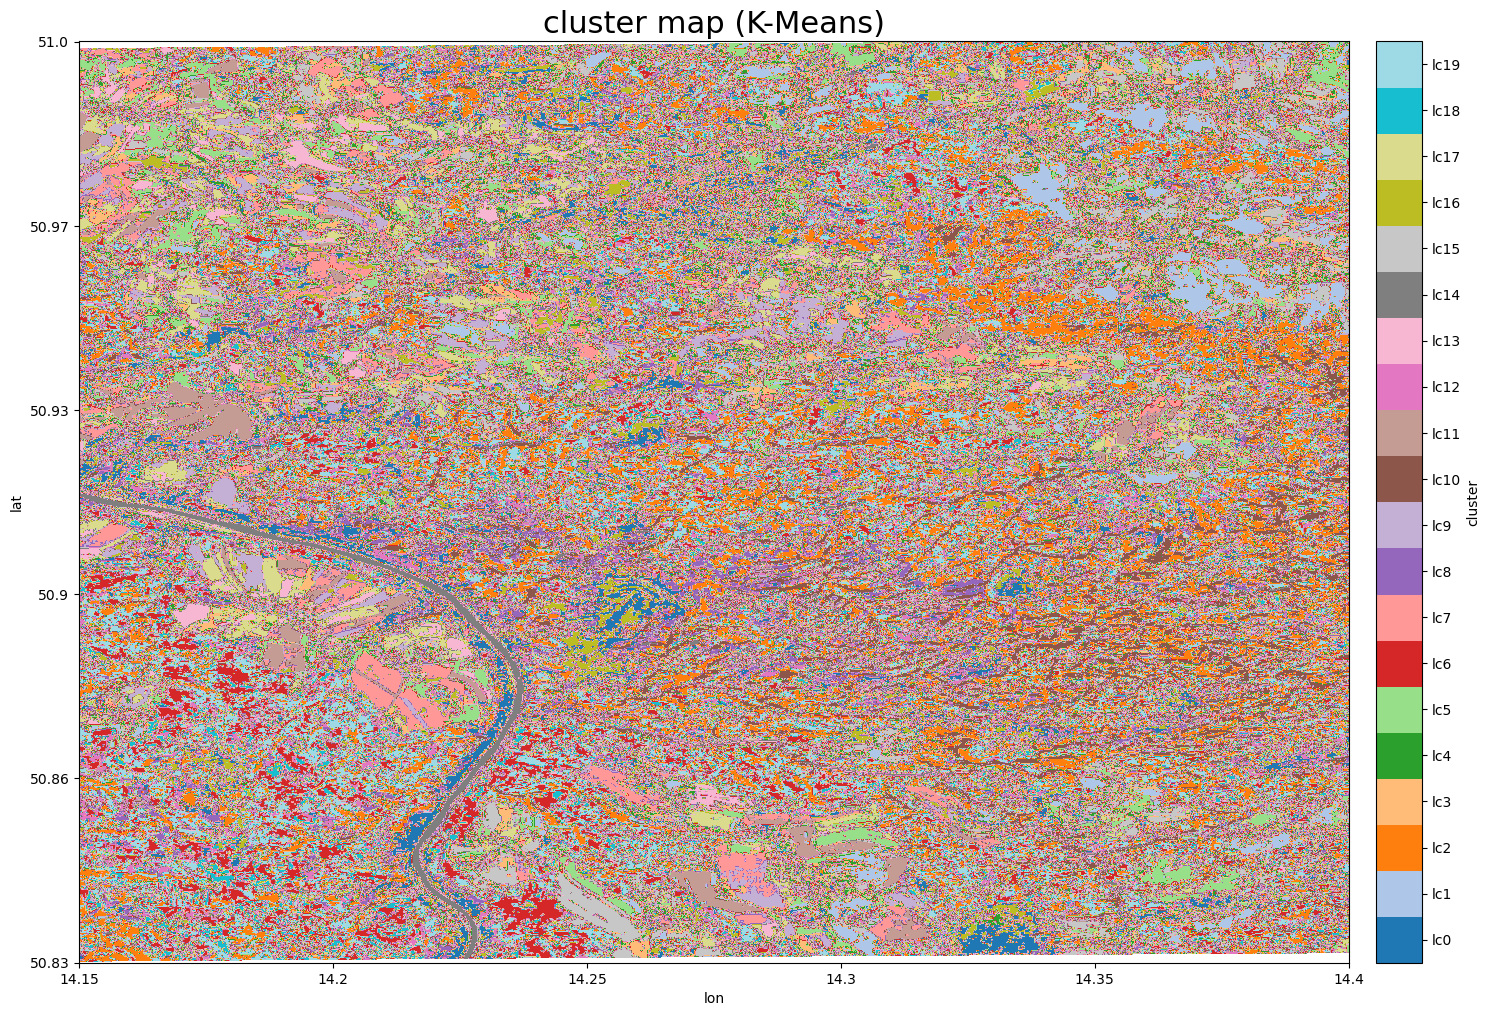

In [16]:
cmap = plt.cm.get_cmap('tab20', n_clusters)  # create colormap
legend_labels = ['lc0', 'lc1', 'lc2', 'lc3', 'lc4', 'lc5', 'lc6', 'lc7', 'lc8', 'lc9','lc10', 'lc11', 'lc12', 'lc13', 'lc14', 'lc15', 'lc16', 'lc17', 'lc18', 'lc19']  # define legend labels
title = 'cluster map (K-Means)'  # set figure title

plotting_lc(ds_cluster, variable='KMeanCluster', n_clusters=n_clusters, cmap=cmap, legend_labels=legend_labels,
            title=title)

In [14]:
#AUSWERTUNG

#Felder - Ic3, Ic5, Ic7, Ic9, Ic11, Ic13, Ic15 
#Wald -  Ic1, Ic2, Ic6
#Wasser - Ic14
#Borkenkäfer - Ic8, Ic10
#Boden - Ic0, Ic16
#NaN - Ic4, Ic12, Ic17, Ic18, Ic19
#
#

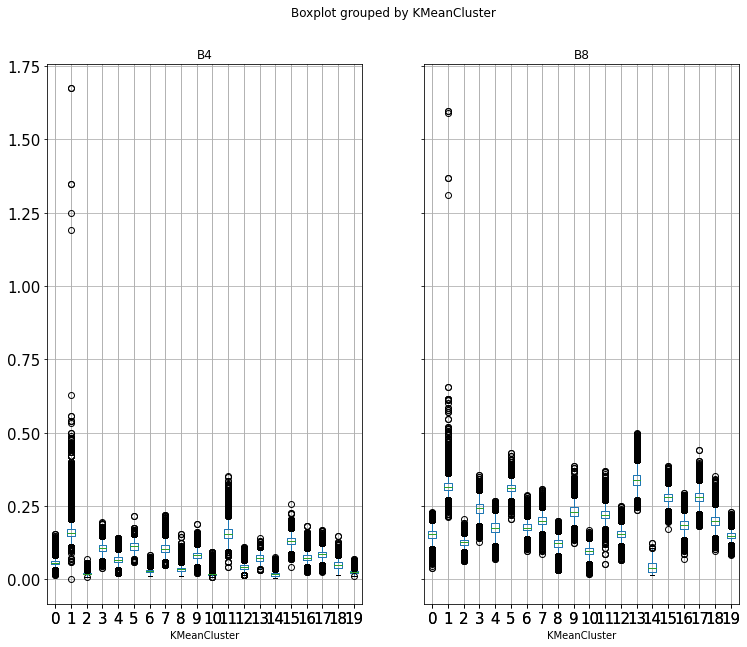

In [17]:
#You can also plot a boxplot to look at the distribution of reflectances in each cluster.

boxplot = df_cluster.boxplot(column=['B4', 'B8'], by='KMeanCluster', figsize=(12,10), fontsize=15)
plt.savefig('D:\\E4\\boxplot_kmeans_clustering_april')

In [16]:
#JOIN REFERENCE DATA

In [18]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm, colors
%matplotlib inline

In [20]:
#opening the clustered data as reference
PATH = 'D:\\E4\\1606\\' 
FILENAME = 'new_kmeans_clustered_subset_april_of_projected_Subset_S2A_MSIL2A_20180409T101031_N0207_R022_T33UVS_20180409T154909_resampled_wt.nc'
ds_1 = xr.open_dataset(PATH+FILENAME)

ds_1.KMeanCluster

<xarray.DataArray 'KMeanCluster' (lat: 954, lon: 2733)>
[2607282 values with dtype=float64]
Coordinates:
  * lat      (lat) float64 51.0 51.0 51.0 51.0 51.0 ... 50.83 50.83 50.83 50.83
  * lon      (lon) float64 14.15 14.15 14.15 14.15 14.15 ... 14.4 14.4 14.4 14.4

In [21]:
#opening the sachsenforst data as reference
PATH = 'D:\\E4\\1606\\' 
FILENAME = 'borkenkaeferbefall2018.nc'
ds_2 = xr.open_dataset(PATH+FILENAME)

ds_2.befall2018

<xarray.DataArray 'befall2018' (lat: 1925, lon: 4981)>
[9588425 values with dtype=float32]
Coordinates:
  * lat          (lat) float64 51.0 51.0 51.0 51.0 ... 50.83 50.83 50.83 50.83
  * lon          (lon) float64 14.0 14.0 14.0 14.0 ... 14.45 14.45 14.45 14.45
    spatial_ref  int32 ...

In [22]:
#Convert the xarray to a pandas dataframe in order to apply clustering and PCA afterwards

df_1 = ds_1.to_dataframe()  # converting to pandas dataframe
df_2 = ds_2.to_dataframe()

In [44]:
combined_ds = xr.open_mfdataset(['D:\\E4\\1606\\new_kmeans_clustered_subset_april_of_projected_Subset_S2A_MSIL2A_20180409T101031_N0207_R022_T33UVS_20180409T154909_resampled_wt.nc', 'D:\\E4\\1606\\borkenkaeferbefall2018.nc'],combine = 'by_coords')

combined_ds

<xarray.Dataset>
Dimensions:       (lat: 2879, lon: 7714)
Coordinates:
  * lat           (lat) float64 50.83 50.83 50.83 50.83 ... 51.0 51.0 51.0 51.0
  * lon           (lon) float64 14.0 14.0 14.0 14.0 ... 14.45 14.45 14.45 14.45
    spatial_ref   int32 ...
Data variables: (12/15)
    B1            (lat, lon) float32 dask.array<chunksize=(2879, 7714), meta=np.ndarray>
    B2            (lat, lon) float32 dask.array<chunksize=(2879, 7714), meta=np.ndarray>
    B3            (lat, lon) float32 dask.array<chunksize=(2879, 7714), meta=np.ndarray>
    B4            (lat, lon) float32 dask.array<chunksize=(2879, 7714), meta=np.ndarray>
    B5            (lat, lon) float32 dask.array<chunksize=(2879, 7714), meta=np.ndarray>
    B6            (lat, lon) float32 dask.array<chunksize=(2879, 7714), meta=np.ndarray>
    ...            ...
    B9            (lat, lon) float32 dask.array<chunksize=(2879, 7714), meta=np.ndarray>
    B11           (lat, lon) float32 dask.array<chunksize=(2879, 7714), meta=np.ndarray>
    B12           (lat, lon) float32 dask.array<chunksize=(2879, 7714), meta=np.ndarray>
    KMeanCluster  (lat, lon) float64 dask.array<chunksize=(2879, 7714), meta=np.ndarray>
    ClusterLabel  (lat, lon) object dask.array<chunksize=(2879, 7714), meta=np.ndarray>
    befall2018    (lat, lon) float32 dask.array<chunksize=(2879, 7714), meta=np.ndarray>

In [48]:
PATH = 'D:\\E4\\1606\\'
SAVING_FILENAME = "combined_reference_data_subset_april_of_projected_Subset_S2A_MSIL2A_20180409T101031_N0207_R022_T33UVS_20180409T154909_resampled_wt.nc"
combined_ds.to_netcdf(PATH + SAVING_FILENAME)

In [ ]:
#SUPERVISED CLASSIFICATION

In [51]:
PATH = "C:\\Users\\valerie\\Desktop\\UNI\\E4\\"
FILENAME_2018 = "projected_Subset_S2A_MSIL2A_20180409T101031_N0207_R022_T33UVS_20180409T154909_resampled_wt.nc"
FILENAME_2019 = "projected_Subset_S2A_MSIL2A_20190921T101031_N0213_R022_T33UVS_20190921T130515_resampled_wt.nc"
FILENAME_REF_2018 = "combined_reference_data_subset_april_of_projected_Subset_S2A_MSIL2A_20180409T101031_N0207_R022_T33UVS_20180409T154909_resampled_wt.nc"
FILENAME_REF_2019 = "barkbeetlearea2019.nc"
data2018 = PATH + FILENAME_2018
data2019 = PATH + FILENAME_2019
ref2018 = PATH + FILENAME_REF_2018
ref2019 = PATH + FILENAME_REF_2019

In [53]:
ds_sc = xr.open_mfdataset([data2018, data2019, ref2018, ref2019])  # this is an option to open and instantly merge the data into one dataset
ds_sc = ds_sc.drop('spatial_ref')
ds_sc = ds_sc[['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12', 'KMeanCluster', 'befall2018']]
ds_sc

<xarray.Dataset>
Dimensions:       (lat: 2879, lon: 7714, time: 2)
Coordinates:
  * lat           (lat) float64 50.83 50.83 50.83 50.83 ... 51.0 51.0 51.0 51.0
  * lon           (lon) float64 14.0 14.0 14.0 14.0 ... 14.45 14.45 14.45 14.45
  * time          (time) datetime64[ns] 2018-04-09 2019-09-21
Data variables: (12/14)
    B1            (lat, lon, time) float32 dask.array<chunksize=(2879, 7714, 1), meta=np.ndarray>
    B2            (lat, lon, time) float32 dask.array<chunksize=(2879, 7714, 1), meta=np.ndarray>
    B3            (lat, lon, time) float32 dask.array<chunksize=(2879, 7714, 1), meta=np.ndarray>
    B4            (lat, lon, time) float32 dask.array<chunksize=(2879, 7714, 1), meta=np.ndarray>
    B5            (lat, lon, time) float32 dask.array<chunksize=(2879, 7714, 1), meta=np.ndarray>
    B6            (lat, lon, time) float32 dask.array<chunksize=(2879, 7714, 1), meta=np.ndarray>
    ...            ...
    B8A           (lat, lon, time) float32 dask.array<chunksize=(2879, 7714, 1), meta=np.ndarray>
    B9            (lat, lon, time) float32 dask.array<chunksize=(2879, 7714, 1), meta=np.ndarray>
    B11           (lat, lon, time) float32 dask.array<chunksize=(2879, 7714, 1), meta=np.ndarray>
    B12           (lat, lon, time) float32 dask.array<chunksize=(2879, 7714, 1), meta=np.ndarray>
    KMeanCluster  (lat, lon) float64 dask.array<chunksize=(2879, 7714), meta=np.ndarray>
    befall2018    (lat, lon) float32 dask.array<chunksize=(2879, 7714), meta=np.ndarray>

In [60]:
def plotting_lc(ds,cmap='NULL', variable='NULL',n_clusters='NULL',legend_labels='NULL',title='NULL', save=False, 
               filename=''):  # plotting function with save option
    ds = ds.sortby('lat', ascending=False)
    
    fig, ax = plt.subplots(figsize=(15,13))
    ax.imshow(ds[variable],cmap=cmap)
    
    # specifying legend
    norm= colors.BoundaryNorm(np.arange(0,n_clusters+1)-0.5, n_clusters)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    cbar = plt.colorbar(sm, ticks=np.arange(0,n_clusters))
    cbar.set_label('class')
    cbar.ax.set_yticklabels(legend_labels)
    
    # specifiying x- and y-axis
    lon_ticks = np.around(np.linspace(ds.lon.data.min(), ds.lon.data.max(), 6), 2)
    lon_ticks_pos = np.linspace(0, len(ds.lon.data), 6)
    lat_ticks = np.around(np.linspace(ds.lat.data.max(), ds.lat.data.min(), 6), 2)
    lat_ticks_pos = np.linspace(0, len(ds.lat.data), 6)
    ax.set_xticks(lon_ticks_pos)
    ax.set_xticklabels(lon_ticks)
    ax.set_yticks(lat_ticks_pos)
    ax.set_yticklabels(lat_ticks)
    ax.set_ylabel('latitude (degrees north)')
    ax.set_xlabel('longitude (degrees east)')
    
    plt.tight_layout()
    plt.title(title, fontsize=22) 
    
    # save automatically the map to *.png
    if save:
        SAVE_FILENAME = filename + '.png'
        SAVE_PATH = PATH
        plt.savefig(SAVE_PATH + SAVE_FILENAME )

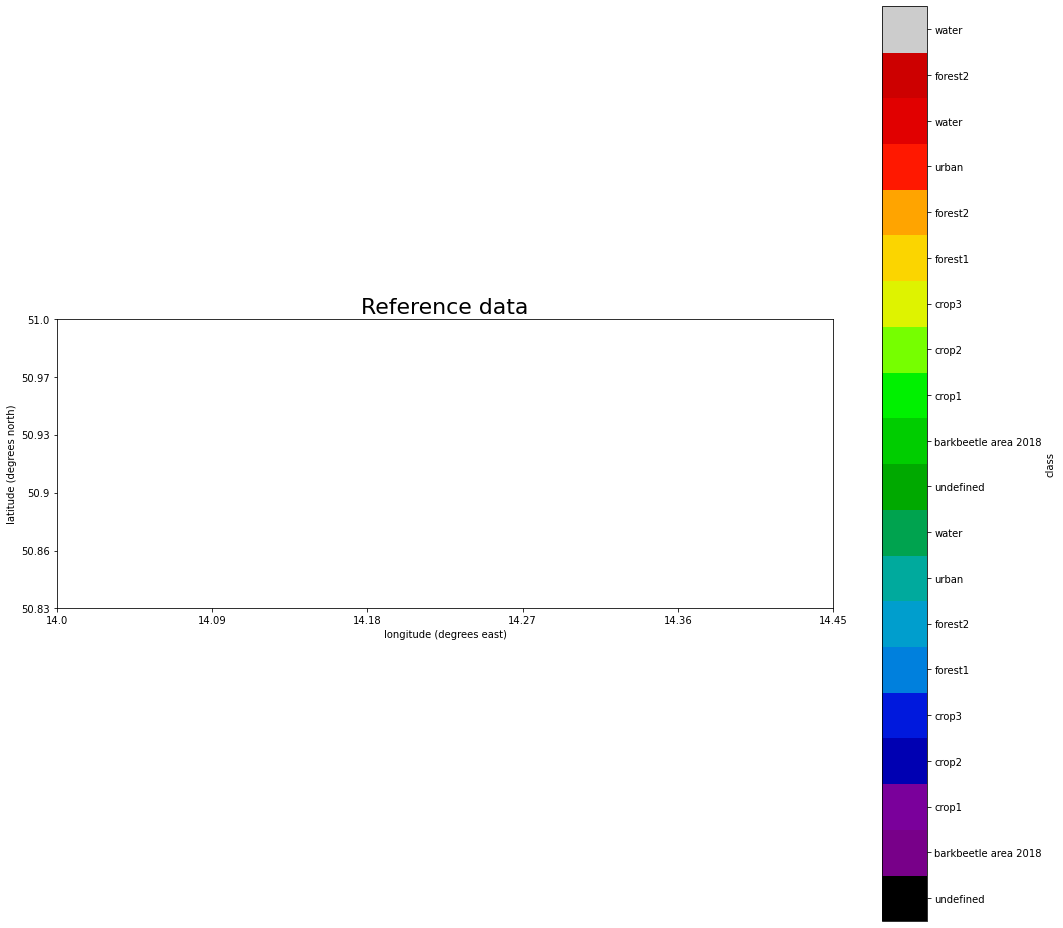

In [63]:
n_class = 20
cmap = plt.cm.get_cmap('nipy_spectral', n_class)  # create colormap
legend_labels = ['undefined', 'barkbeetle area 2018', 'crop1', 'crop2', 'crop3','forest1', 'forest2', 'urban', 'water','undefined', 'barkbeetle area 2018', 'crop1', 'crop2', 'crop3','forest1', 'forest2', 'urban', 'water','forest2', 'water']  # define legend labels
plotting_lc(ds_sc, variable='befall2018', n_clusters=n_class, cmap=cmap, legend_labels=legend_labels, title='Reference data')

In [ ]:
#SUPERVISED CLASSIFICATION NEW